In [43]:
#!/usr/bin/env python
# coding: utf-8

# In[1]:


import numpy as np
import cv2
import os
import random
import matplotlib.pyplot as plt


# In[2]:


DIRECTORY= r"C:\Users\Asus\leaf"
CATAGORIES= ['Strawberry_fresh','Strawberry_scrotch']


        

In [44]:
data=[]

for categories in CATAGORIES:
    folder=os.path.join(DIRECTORY,categories)
    label=CATAGORIES.index(categories)
    
    
    for img in os.listdir(folder):
        img=os.path.join(folder,img)
        img_arr=cv2.imread(img)
        img_arr=cv2.resize(img_arr,(100,100))
        
        data.append([img_arr,label])

In [45]:
data
random.shuffle(data)

In [46]:
x=[]
y=[]
for features,labels in data:
    x.append(features)
    y.append(labels)


In [47]:
X= np.array(x)
Y=np.array(y)
X=X/255
X
X.shape

(100, 100, 100, 3)

In [48]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Activation

In [49]:
model=Sequential()
model.add( Conv2D(64,(3,3),input_shape=X.shape[1:],activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add( Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Flatten())

model.add(Dense(2,activation='softmax'))

In [50]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [51]:
model.fit(X,Y,epochs=15,validation_split=0.1)


Epoch 1/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 388ms/step - accuracy: 0.5778 - loss: 0.6828 - val_accuracy: 0.3000 - val_loss: 0.7432
Epoch 2/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 242ms/step - accuracy: 0.6333 - loss: 0.6559 - val_accuracy: 0.9000 - val_loss: 0.6105
Epoch 3/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.8111 - loss: 0.5963 - val_accuracy: 1.0000 - val_loss: 0.5597
Epoch 4/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 187ms/step - accuracy: 0.8333 - loss: 0.5098 - val_accuracy: 0.9000 - val_loss: 0.3865
Epoch 5/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 205ms/step - accuracy: 0.8333 - loss: 0.4432 - val_accuracy: 0.9000 - val_loss: 0.3480
Epoch 6/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 199ms/step - accuracy: 0.9333 - loss: 0.3281 - val_accuracy: 0.9000 - val_loss: 0.2456
Epoch 7/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 234ms/step - accuracy: 0.9333 - loss: 0.2490 - val_accuracy: 1.0000 - val_loss: 0.2988
Epoch 8/15
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.9222 - loss: 0.2144 - val_accuracy: 1.0000 - val_loss:

In [52]:
from keras.preprocessing import image
import numpy as np

img_pred=image.load_img(r"C:\Users\Asus\leaf\Strawberry_scrotch\1a0eaf21-1ae4-4018-807a-af8667ed0811___RS_L.Scorch 0064.JPG",target_size=(100,100))

img_pred=image.img_to_array(img_pred)
img_pred=np.expand_dims(img_pred, axis=0)


rslt= model.predict(img_pred)

print(rslt)
if rslt[0][0]>rslt[0][1]:
    prediction="Strawberry_fresh"
    
    
else:
    prediction="Strawberry_scrotch"
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
[[0. 1.]]
Strawberry_scrotch


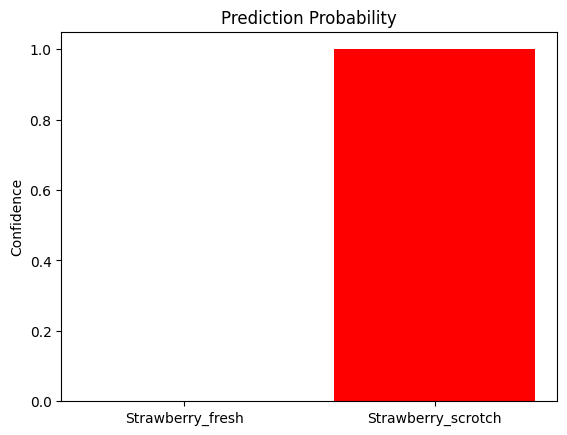

In [53]:
classes = ['Strawberry_fresh', 'Strawberry_scrotch']
plt.bar(classes, rslt[0], color=['green', 'red'])
plt.title("Prediction Probability")
plt.ylabel("Confidence")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step


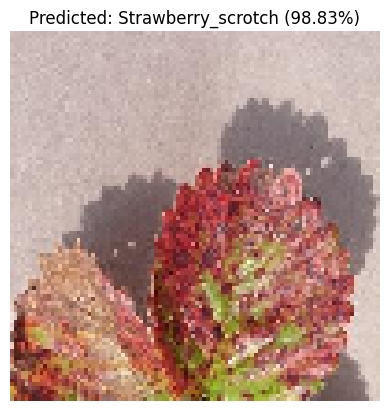

In [54]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np

img_pred = image.load_img(
    r"C:\Users\Asus\leaf\Strawberry_scrotch\1a0eaf21-1ae4-4018-807a-af8667ed0811___RS_L.Scorch 0064.JPG",
    target_size=(100,100)
)
img_arr = image.img_to_array(img_pred) / 255.0

rslt = model.predict(np.expand_dims(img_arr, axis=0))
pred_class = np.argmax(rslt[0])
classes = ['Strawberry_fresh', 'Strawberry_scrotch']

plt.imshow(img_arr)
plt.title(f"Predicted: {classes[pred_class]} ({rslt[0][pred_class]*100:.2f}%)")
plt.axis('off')
plt.show()


In [55]:
from tensorflow.keras import Input, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

inp = Input(shape=(100,100,3))
x = Conv2D(64, (3,3), activation='relu')(inp)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Conv2D(32, (3,3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2,2))(x)
x = Flatten()(x)
out = Dense(2, activation='softmax')(x)

model = Model(inputs=inp, outputs=out)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step


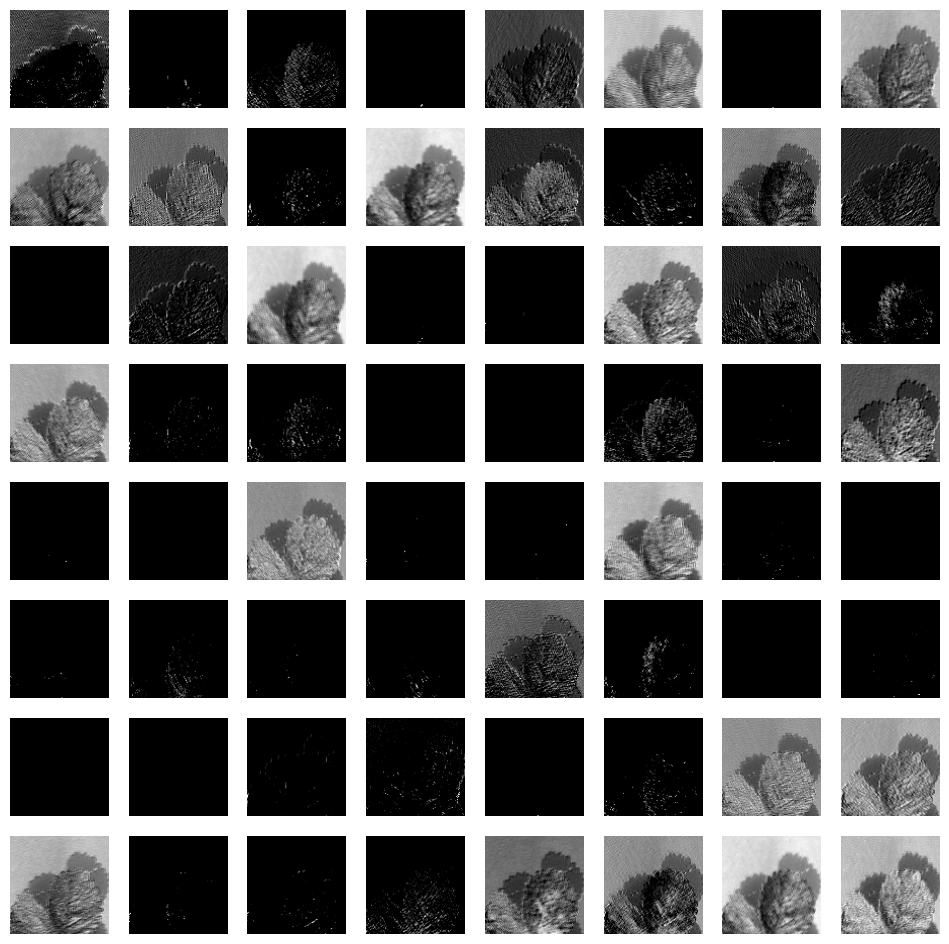

In [ ]:

_ = model.predict(X[:1])   

from tensorflow.keras.models import Model


layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
activation_model = Model(inputs=model.input, outputs=layer_outputs)


img_pred = image.load_img(
    r"C:\Users\Asus\leaf\Strawberry_scrotch\1a0eaf21-1ae4-4018-807a-af8667ed0811___RS_L.Scorch 0064.JPG",
    target_size=(100,100)
)
img_pred = image.img_to_array(img_pred) / 255.0
img_pred = np.expand_dims(img_pred, axis=0)

activations = activation_model.predict(img_pred)


first_layer_activation = activations[0]
n_features = first_layer_activation.shape[-1]

plt.figure(figsize=(12, 12))
for i in range(min(n_features, 64)):
    ax = plt.subplot(8, 8, i + 1)
    plt.imshow(first_layer_activation[0, :, :, i], cmap='gray')
    plt.axis('off')
plt.show()
